# Foundation of Robot Motion

The most fundamental question we can ask about a robot is, "Where is it?"
The answer to this question is the robot's Configuration.

The Configuration is a vector of numbers that fully describes the position of the robot.

Robots are composed of rigid links connected by joints. The joints can be actuated by motors to change the configuration of the robot.

![Example of links and joints](images/Joints-and-Links-of-Robot.png)

Source: [researchgate](https://www.researchgate.net/figure/Joints-and-Links-of-Robot_fig4_301895257)


The configuration space of a robot is the set of all possible configurations of the robot. Configuration space is also known as C-space, or C<sub>space</sub>.

The dimension of the configuration space is the number of degrees of freedom of the robot (DOF). In other words the number of independent parameters required to fully specify the configuration of the robot.

Imagine a robot with two revolute joints, which means it has two joints that can rotate. To fully describe the robot's position, we need to know the angles of both joints.

Now, let's visualize the angles of the joints. We can think of the angle of joint 2 as a point on a circle, and the angle of joint 1 as a point on another circle. These circles represent the possible values that the angles can take.

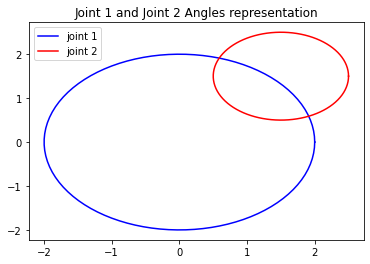

In [88]:
# Representation of joint angles for a 2R robot
import numpy as np
import matplotlib.pyplot as plt

# joint 1
r1 = 2
x1 = 0
y1 = 0

# joint 2
r2 = 1
x2 = 1.5
y2 = 1.5


# plot joint 1 possible angles
theta = np.linspace(0, 2*np.pi, 100)
x = r1*np.cos(theta) + x1
y = r1*np.sin(theta) + y1
plt.plot(x, y, 'b')

# plot joint 2 possible angles around a point in joint 1
theta = np.linspace(0, 2*np.pi, 100)
x = r2*np.cos(theta) + x2
y = r2*np.sin(theta) + y2
plt.plot(x, y, 'r')

plt.legend(['joint 1', 'joint 2'])
plt.title('Joint 1 and Joint 2 Angles representation')
plt.show()


To visualize the entire configuration space (c-space) of the robot, we can rotate the circle of joint 1 to be perpendicular to the circle of joint 2. This means that for each angle of joint 1, we can draw the circle of joint 2. We repeat this for every angle of joint 1.

When we do this, we end up with a 2D shape called a torus. A torus is like a donut shape, where we have a circle within another circle. The inner circle represents the possible angles of joint 2, and the outer circle represents the possible angles of joint 1.

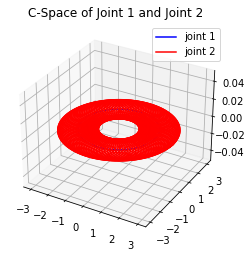

In [89]:
# drawing circles of joint 2 around each point of joint 1
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# plot circle 1
theta = np.linspace(0, 2*np.pi, 100)
x = r1*np.cos(theta) + x1
y = r1*np.sin(theta) + y1
z = np.zeros(100)
ax.plot(x, y, z, 'b')

# at each point of joint 1, plot a circle of joint 2
for xi, yi, zi in zip(x, y, z):
    theta = np.linspace(0, 2*np.pi, 100)
    x = r2*np.cos(theta) + xi
    y = r2*np.sin(theta) + yi
    z = np.ones(100)*zi
    ax.plot(x, y, z, 'r')

plt.legend(['joint 1', 'joint 2'])
plt.title('C-Space of Joint 1 and Joint 2')
plt.show()


So, the configuration space of a robot with 2 degrees of freedom (2 DOF) is a 2D torus. Each point on the torus corresponds to a unique configuration of the robot, meaning a specific combination of joint angles. Similarly, for every possible configuration of the robot, there is a unique point on the torus.

As we mentioned before, when we talk about the dimension of the configuration space, we are referring to the number of dimensions or variables needed to fully describe the position and orientation of the robot. In simpler terms, it tells us how many different ways the robot can move or change its configuration.

Now, when we say that a robot consists of rigid bodies, it means that the different parts of the robot do not deform or bend easily. They maintain their shape and size. This rigidity affects the number of degrees of freedom of the robot.

The number of degrees of freedom of a robot is directly influenced by the number of degrees of freedom of each individual rigid body that makes up the robot. In other words, if a single rigid body has a certain number of degrees of freedom, the overall robot will have the same number.

For example, let's consider a simple scenario where each rigid body in the robot has only one degree of freedom. This means that each part can move or rotate in one specific way. If the robot consists of three such rigid bodies, the overall robot will have three degrees of freedom because each part contributes one degree of freedom.

## Degrees of Freedom of a Rigid Body

Imagine you have a rigid body, like a solid Cube. To determine the number of degrees of freedom of a rigid body, we can follow these steps:

1. we start by choosing a point on that body. We need three numbers to specify the position of this point (x, y, z).

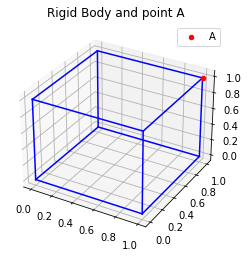

In [90]:
# First point A on a rigid body
def draw_square(ax):
    for i in range(4):
        ax.plot(cube[[i, (i+1)%4], 0],
            cube[[i, (i+1)%4], 1],
            cube[[i, (i+1)%4], 2], 'b')
        ax.plot(cube[[i+4, (i+1)%4+4], 0],
            cube[[i+4, (i+1)%4+4], 1],
            cube[[i+4, (i+1)%4+4], 2], 'b')
        ax.plot(cube[[i, i+4], 0],
            cube[[i, i+4], 1],
            cube[[i, i+4], 2], 'b')
# Draw a rigid body "Cube" and a point A on it
# Cube
cube = np.array([[0, 0, 0],
                    [0, 1, 0],
                    [1, 1, 0],
                    [1, 0, 0],
                    [0, 0, 1],
                    [0, 1, 1],
                    [1, 1, 1],
                    [1, 0, 1]])
# point A
A = np.array([1, 1, 1])

# plot cube full lines
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
draw_square(ax)
# plot point A
ax.scatter(A[0], A[1], A[2], c='r', marker='o', label='A')
plt.title('Rigid Body and point A')
plt.legend()
plt.show()


2. Now, we choose a second point on the rigid body. However, because it is a rigid body, the distance between the first and second points must remain constant. This means that the second point can only move on a sphere around the first point, like a ball on the surface of a bubble. We only need two numbers to specify the position of the second point because the distance from the first point and the sphere's radius (r) uniquely determine its position.

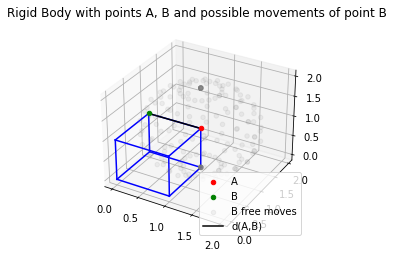

In [91]:
# The surface of the sphere is the set of points that are at a distance r from the center A and which B can move
# Cube
cube = cube
# point A
A = np.array([1, 1, 1])
# point B
B = np.array([0, 1, 1])
# sphere center at point A
# radius is the distance between point A and B
r = 1
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x = r*np.cos(u)*np.sin(v) + A[0]
y = r*np.sin(u)*np.sin(v) + A[1]
z = r*np.cos(v) + A[2]

# plot cube full lines
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
draw_square(ax)
# plot point A
ax.scatter(A[0], A[1], A[2], c='r', marker='o', label='A')
# plot point B
ax.scatter(B[0], B[1], B[2], c='g', marker='o', label='B')
ax.scatter(x, y, z, c='gray', marker='o', label='B free moves', alpha=0.1)
# plot line between A and B
ax.plot([A[0], B[0]], [A[1], B[1]], [A[2], B[2]], 'black', label='d(A,B)') 

plt.title('Rigid Body with points A, B and possible movements of point B')
plt.legend()
plt.show()


3. After choosing the first and second points on the rigid body, we move on to selecting the third point. At this stage, the positions of the first and second points are already fixed.

Now, imagine two spheres: one centered at the first point and the other centered at the second point. These spheres represent all the possible positions for the third point that maintain the fixed distances between the points.

The intersection of these two spheres forms a circle. This circle represents all the possible positions for the third point that satisfy the constraints of the rigid body. The circle lies in the plane defined by the first two points.

To determine the location of the third point on this circle, we only need one number. Which represents the angle of the third point around the circle.

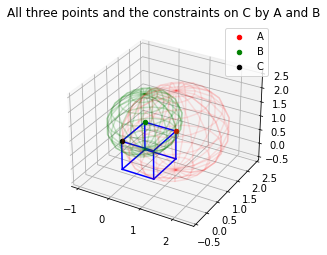

In [92]:
# The intersection of two spheres is the circe in which Point C can move
def draw_sphere(A, r1, ax, u, v, color="r", alpha=0.1):
    x = r1*np.cos(u)*np.sin(v) + A[0]
    y = r1*np.sin(u)*np.sin(v) + A[1]
    z = r1*np.cos(v) + A[2]
    ax.plot_wireframe(x, y, z, color=color, alpha=alpha)

# point A
A = np.array([1, 1, 1])
# point B
B = np.array([0, 1, 1])
# point C
C = np.array([0, 0, 1])
# r1 is the distance between point A and C
r1 =  np.linalg.norm(A-C)
# r2 is the distance between point B and C
r2 =  np.linalg.norm(B-C)

# plot cube full lines
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
draw_square(ax)

# plot point A
ax.scatter(A[0], A[1], A[2], c='r', marker='o', label='A')
# plot point B
ax.scatter(B[0], B[1], B[2], c='g', marker='o', label='B')
# plot point C
ax.scatter(C[0], C[1], C[2], c='black', marker='o', label='C')

# draw two spheres
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
draw_sphere(A, r1, ax, u, v)
draw_sphere(B, r2, ax, u, v, color="g", alpha=0.2)
plt.title('All three points and the constraints on C by A and B')
plt.legend()
plt.show()


When we have fixed the positions of all three points, as long as they are not in a straight line (collinear), the orientation of the rigid body becomes fixed. This means that if you know the positions of these three points, you can determine exactly how the rigid body is oriented.

In summary, the number of degrees of freedom of a rigid body is 6. We have:
- 3 for the position of the first point
- 2 for the position of the second point
- 1 for the position of the third point

Lets count for each point the number of coordinates, the number of constraints, and the number of real free in choosing the location of the point.

<!-- FILEPATH: e:\robotics_fundamentals\foundation_robot_motion.ipynb -->
<p>Lets count for each point the number of coordinates, the number of constraints, and the number of real free in choosing the location of the point.</p>
<table style="text-align:center">
<thead>
<tr>
<th>Point</th>
<th>Coordinates</th>
<th>Constraints</th>
<th>Free Parameters</th>
</tr>
</thead>
<tbody>
<tr>
<td>A</td>
<td>3</td>
<td>0</td>
<td>3</td>
</tr>
<tr>
<td>B</td>
<td>3</td>
<td>1</td>
<td>2</td>
</tr>
<tr>
<td>C</td>
<td>3</td>
<td>2</td>
<td>1</td>
</tr>
<tr>
<td>D, etc.</td>
<td>3</td>
<td>3</td>
<td>0</td>
</tr>
<tr>
<td colspan="3">Total DOF</td>
<td>6</td>
</tr>
</tbody>
</table>



Thus a rigid body in space has six total degrees of freedom, three for the position (x, y, z) of the center of mass and three for the orientation (pitch roll yaw) of the body.

We could use the same method to learn that a rigid body in 2D has 3 degrees of freedom, two which is linear (position) and one which is an angle (orientation).


Here is a general rule to summarize the number of degrees of freedom, which hold for any system not just rigid bodies.

The dimension of the configuration space of a system is equal to the sum of degrees of freedom of points minus the number of independent constraints acting on those points.

dof = sum(freedom of points) - number of independent constraints

Since the robot consists of rigid bodies, the number of degrees of freedom of the robot depends on the sum of degrees of freedom of the rigid bodies minus the number of independent constraints acting on those rigid bodies.

dof = sum(freedom of rigid bodies) - number of independent constraints

## Degrees of Freedom of a Robot

In the previous section, we learned that the number of degrees of freedom of a robot is how many ways it can move. We count how each part can move and add them up. Then we subtract any restrictions or limits on movement called constraints. The result is the number of degrees of freedom. The constrains on motion often come from joints. 

The most common type of joint is a revolute joint, which places 5 constraints on motion of the second rigid body relative to the first and therefore the second rigid body has 1 degree of freedom which allows it to rotate around the axis of the joint.

<div> <img src="images/Revolute-1-DOF-Joint.png" width="300"/> </div> 

Another common 1 degree of freedom joint is the prismatic joint also called a slider joint. This joint allows the second rigid body to move along a line relative to the first rigid body.

<div> <img src="images/Prismatic-1-DOF-Joint.png" width="300"/> </div>

We can also have joints with more than one degree of freedom. For example, a spherical joint allows the second rigid body to rotate around any axis relative to the first rigid body.

<div> <img src="images/Spherical-3-DOF-Joint.png" width="300"/> </div>

Source: [researchgate](https://www.researchgate.net/figure/Revolute-1-DOF-Joint_fig1_311414943)

This table summarizes the degrees of freedom for the these three joints and other common joints.

| Joint Type | DOF | Planar Constrains 2D | Spatial Constrains 3D |
| :---: | :--: | :-: | :-: |
| Fixed | 0 | 3 | 6 |
| Revolute | 1 | 2 | 5 |
| Prismatic | 1 | 2 | 5 | 
| Helical | 1 | N/A | 5 |
| Universal | 2 | N/A | 4 |
| Cylindrical | 2 | N/A | 4 |
| Spherical | 3 | N/A | 3 |


for more joints see [here](https://doc.comsol.com/5.5/doc/com.comsol.help.mbd/mbd_ug_modeling.3.07.html).


Using this table of freedoms and constraints, we can come with a simple expression to count the degrees of freedom of most robots, using the formula form the previous section.

$dof = sum(freedom of rigid bodies) - number of independent constraints$

Lets say that our robot has :

$N = number of links, including ground

J = number of joints

m = degrees of freedom of a single body (6 for a rigid body in 3D space, 3 for a rigid body in 2D space)$

we can write the formula in term of those variables as:

$dof = m(N-1) - \sum_{i=1}^{J} c_i$

where $N-1$ is the number of links other than ground and $m(N-1)$ is the sum of degrees of freedom of the rigid bodies if they are not connected by joints.

Then we subtract of the constrains provided by the J joints. The number of constrains provided by each joint i is equal to m minus the number of degrees of freedom allowed by the joint. For example, a revolute joint provides 5 constrains in 3D space, so $c_i = 6 - 1 = 5$.

So we can replace $c_i$ with $m - f_i$ where $f_i$ is the number of degrees of freedom allowed by joint i and we get:

$dof = m(N-1) - \sum_{i=1}^{J} (m - f_i)$

By distributing the negative sign and developing we get:

$dof = m(N-1) - mJ + \sum_{i=1}^{J} f_i$

Now by factoring out m and we get **Grübler's Formula**:

$dof = m(N-J-1) + \sum_{i=1}^{J} f_i$

Grübler's Formula assumes that the joints are independent, which means that the motion of one joint does not affect the motion of another joint. This is not always true, but it is a good approximation for most robots.

Lets apply Grübler's Formula to a few mechanisms.

the first  mechanism is called a serial, or open chain, robot because there is a single path from the ground to the end of the robot. It's called a 3R robot because it has 3 revolute joints.

<div> <img src="images/3R-planar-manipulator.png" width="400"/> </div>

source: [researchgate](https://www.researchgate.net/figure/3R-planar-manipulator_fig1_276511399)

This planar robot has 3 links, 3 joints, and 3 degrees of freedom. We can verify this by applying Grübler's Formula. 

In [93]:
def grupler_formula(m, N, J, f):
    # $dof = m(N-J-1) + \sum_{i=1}^{J} f_i$    
    return m*(N-J-1) + np.sum(f)
# for the planar 3R Robot we have the following variables
m = 3 # number of degrees of freedom on 2D plane
N = 4 # number of links including the base
J = 3 # number of joints
# number of degrees of freedom for each joint
f = np.array([1, 1, 1])
dof = grupler_formula(m, N, J, f)
# should get 3 as expected
print("dof of the planar 3R robot using Grübler's formula is: ", dof) 

dof of the planar 3R robot using Grübler's formula is:  3


The next mechanism is called a four bar linkage, obtained by connecting two 2R robots together. This mechanism is called a planar closed chain (closed loop) because there is no single path from the ground to the end of the robot.

<div> <img src="images/FourBarChain.png" width="400"/> </div>

Source: [dtonline](http://wiki.dtonline.org/index.php/File%253AFourBarChain.png)

As before, we can verify that this mechanism has 1 degrees of freedom by applying Grübler's Formula.

In [94]:
# Four bar linkage 'closed chain' mechanism
# we have the following variables
m = 3 # number of degrees of freedom on 2D plane
N = 4 # number of links including the common base
J = 4 # number of joints
# number of degrees of freedom for each joint
f = np.array([1, 1, 1, 1])
dof = grupler_formula(m, N, J, f)
# should get 1 as expected
print("dof of four bar linkage using Grübler's formula is: ", dof)

dof of four bar linkage using Grübler's formula is:  1


We could also predict the of this mechanism by the fact that pinning the endpoint of the the previous  3R robot to the ground removes 2 degrees of freedom (x, y), leaving 1 degree of freedom. 

The next mechanism is like the four-bar, except now it adds one more link and two more joints. Grübler's Formula tells us that this mechanism has zero degrees of freedom, which is wrong; it still has one degree of freedom. The problem is that Grübler's Formula assumes that the joints are independent, which is not true for this mechanism. The motion of one joint affects the motion of the other joint. This is called a dependent joint.

<div> <img src="images/fourbarchainplus.png" width="400"/> </div>

Source: Morden Robotics

In [95]:
# Similar to Four bar linkage with extra link and two joints
m = 3 # number of degrees of freedom on 2D plane
N = 5 # number of links including the common base
J = 6 # number of joints

# number of degrees of freedom for each joint
f = np.array([1, 1, 1, 1, 1, 1])
dof = grupler_formula(m, N, J, f)
# should get 0 as expected which is wrong because the joints constrains are not independent
print("the wrong dof of the mechanism with dependent joints constrains using Grübler's formula is: ", dof)


the wrong dof of the mechanism with dependent joints constrains using Grübler's formula is:  0


Finally we have a spatial closed chain mechanism called a Stewart Platform. It has 6 legs connecting the base to the platform. Each leg consists of two links and a universal joint, a prismatic joint, and a spherical joint. The prismatic joint is actuated and the other joints are passive.

<div> <img src="images/Hexapod_general_Anim.gif" width="200"/> </div>

source: [Wikipedia](https://en.wikipedia.org/wiki/Stewart_platform)

Since each leg has 2 links, there is a total of 12 links in the legs, and adding the base and platform, there are 14 links. There are 6 prismatic joints, 6 universal joints, and 6 spherical joints for a total of 18 joints with 36 total freedoms. Applying Grübler's Formula, we get 6 degrees of freedom, which is correct.

In [96]:
# Stewart Platform 6xUPS
# we have the following variables
m = 6 # number of degrees of freedom on 3D space
N = 14 # number of links including base and platform
J = 18 # 6 prismatic joints, 6 universal joints and 6 spherical joints
# number of degrees of freedom for each joint
pj = [1] * 6 # prismatic joints
uj = [2] * 6 # universal joints
sj = [3] * 6 # spherical joints
f = np.array(pj + uj + sj)
dof = grupler_formula(m, N, J, f)
# should get 6 as expected
print("dof of the Stewart Platform 6xUPS using Grübler's formula is: ", dof)

dof of the Stewart Platform 6xUPS using Grübler's formula is:  6


There a limit in the range of motion of the platform but it doesn't affect the degrees of freedom of the mechanism.

## Configuration Space Topology

In addition to the number of degrees of freedom, another important property of a configuration space is its shape, or topology.

The topology of a space is the set of all possible shapes that can be obtained by stretching, bending, and deforming the space without tearing or gluing it.

Consider a plane and a surface of a sphere. Both of these spaces have two dimensions, but they have different shapes. The sphere wraps around in a way that the plane does not. This difference in shape impacts the way we use coordinates to represent the space.

We say that two spaces are topologically equivalent (have the same shape) if one can be smoothly deformed into the other without tearing or gluing. For example, a surface of a torus can be deformed into the surface of a coffee cup, so they are topologically equivalent. They cannot be deformed into a plane without cutting, so the plane is not topologically equivalent to a torus.

![Mug_and_Torus_morph.gif](images/Mug_and_Torus_morph.gif)

source: [Wikipedia](https://en.wikipedia.org/wiki/File%253AMug_and_Torus_morph.gif)

The topology of a space is fundamental property and it is not affected by our choice of how to represent the space. For example, we can represent the surface of a sphere using spherical coordinates or Cartesian coordinates, but the topology of the space is the same either way.

Some topologically distinct one dimensional spaces are a circle, a line and a closed interval of a line.

Topologically distinct two dimensional spaces include the plane, the surface of a sphere, the surface of a torus, and the surface of a cylinder.

Let's look at some examples of physical systems with two-dimensional configuration spaces.

| System | Topology | sample representation |
| --- | --- | --- |
| point on plane | plane $E^2$ | (x, y) $R^2$ |
| spherical pendulum | sphere $S^2$ | longitude, latitude |
| 2R robot | torus $S^1 \times S^1$ | $(0, 2\pi) \times (0, 2\pi)$ |
| rotating sliding knob | cylinder $S^1 \times E^1$ | $(0, 2\pi) \times R$ |

The topology of each c-space, as you can see in the middle column does not depend on how we decide to represent the space using coordinates, whereas the representation of coordinates depend on an arbitrary choice of origin and orientation.

Lets focus on the 2R robot. The topology of the C-space is a torus. We can represent the torus using the two joint angle coordinates, ranging from 0 to 2pi. The space of coordinates is obtained from the torus by cutting the torus once to get a cylinder, then again to get a square subset of the plane.

Here is an inverse reformulation of the torus from the square by gluing the edges of the square together.

![Torus_from_rectangle.gif](images/Torus_from_rectangle.gif)

source: [Wikimedia](https://commons.wikimedia.org/wiki/File%253ATorus_from_rectangle.gif)

Because of this cutting, which means that the square and the torus are not topologically equivalent, even if the configuration on the torus moves smoothly, the coordinates on the square will jump from 0 to 2pi and back to 0. This is called a discontinuity.

Now lets focus on the rotating and sliding knob. The topology of the C-space is a cylinder. The space of coordinates is obtained from the cylinder by cutting the cylinder once to get a square subset of the plane. The angle coordinate is discontinuous at the cut at 0 and 2pi.

Finally the spherical pendulum has a spherical topology and we can see its representation as a subset of the plane. The angle coordinates are discontinuous at the north, south, east, and west poles.

## Configuration Space Representation

To represent c-space using real numbers we need to make some arbitrary choices. For example, to represent points on a plane, we choose a point in the plane and call it the origin. Then we choose two orthogonal axes and call them x and y. Then we can represent any point in the space using two coordinates, x and y. 

Of course the representation of the space does not change the underlying topology of the space itself. Therefore, the topology of the space is independent of the representation we choose. If the space is "flat", like a line, a plane, or more generally an n-dimensional Euclidean space, we typically use Cartesian coordinates. The velocity is then just the time derivative of the coordinates denoted by $(\dot{x}, \dot{y})$.

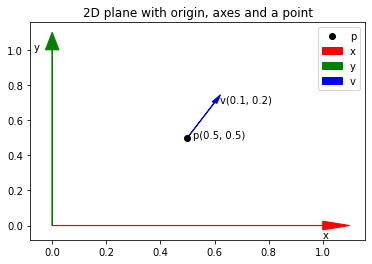

In [97]:
# A representation of a point in a 2D plane
# choose a point in the plane and call it the origin
origin = np.array([0, 0])
# choose two orthogonal axes and call them x and y
x = np.array([1, 0])
y = np.array([0, 1])
# represent any point in the space using two coordinates, x and y
p = np.array([0.5, 0.5])
# plot the point
plt.plot(p[0], p[1], 'o', color='black', label='p')
# add a text with the coordinates of the point
plt.text(p[0] + 0.02, p[1], 'p(0.5, 0.5)')
# plot the axes with arrows
plt.arrow(origin[0], origin[1], x[0], x[1], head_width=0.05, head_length=0.1, color='r', label='x')
plt.arrow(origin[0], origin[1], y[0], y[1], head_width=0.05, head_length=0.1, color='g', label='y')
# add a text with the name of the axes
plt.text(x[0] , x[1] -0.07, 'x')
plt.text(y[0] -0.07, y[1], 'y')
# the velocity of the point p is defined as the derivative of the position vector
# v = dx/dt * x + dy/dt * y
# if we assume that the point p is moving with a velocity of 0.1 along the x axis
# and 0.2 along the y axis, then the velocity vector is
v = 0.1 * x + 0.2 * y
# plot the velocity vector
plt.arrow(p[0], p[1], v[0], v[1], head_width=0.02, head_length=0.05, color='b', label='v')
# add a text with the velocity vector
plt.text(p[0] + v[0] + 0.02, p[1] + v[1], 'v(0.1, 0.2)')

plt.title('2D plane with origin, axes and a point')
plt.legend()
plt.show()

If the space curved, however, like a sphere, we have two ways we could represent it:

1. Use an EXPLICIT PARAMETRIZATION, which uses a minimum number of coordinates to represent the space.  
For example, we can represent a point on a sphere using two angles, longitude and latitude. The velocity is then the time derivative of the coordinates, $(\dot{\theta}, \dot{\phi})$.

2. Use an IMPLICIT PARAMETRIZATION, which uses a larger number of coordinates, subject to constraints. An implicit representation views the n-dimensional space as a subset of a higher dimensional euclidean space.  
For example, we can represent a point on a sphere using three coordinates, x, y, and z, where x^2 + y^2 + z^2 = 1. The velocity is then the time derivative of the coordinates, $(\dot{x}, \dot{y}, \dot{z})$.

So how do we choose between explicit and implicit representations? 

An advantage of the explicit parametrization is the simplicity of the minimum number of coordinates. A disadvantage is that, because the topology of the space is not preserved, the representation will have poor behavior at some points on the space. For example, the longitude and latitude representation of a sphere has a singularity at the north and south poles. Make in mind that it has nothing to do with the topology of the sphere itself, but it is a consequence of the representation we choose.

An advantage of the implicit parametrization is that the representation is smooth everywhere. A disadvantage is that the representation is more complex, and it is not always easy to find a set of coordinates that satisfy the constraints.

## Configuration and Velocity Constraints

For robots with links and joint forming a closed loops, it is often easier to find an implicit representation of the configuration space rather than an explicit parametrization.

<div> <img src="images/4BarChainClosure.png" width="400"/> </div>

source: Modern Robotics

Consider a 4-bar closed chain with four revolute joints. Grübler's formula tells us that the number of degrees of freedom is 1, so it should be possible to represent the configuration space using a single coordinate. This representation may be hard to find and may have singularities, so we could view the C-space as a 1-dimensional space embedded in a 4-dimensional space of joint angles, defined by the three loop-closure equations that say the final position and orientation after moving around the loop must be the same as the initial position and orientation.

The three loop-closure equations are:
$$
\begin{align}
L_1 \cos \theta_1 + L_2 \cos (\theta_1 + \theta_2) + ... + L_4 \cos (\theta_1 + ... + \theta_4) &= 0 \\
L_1 \sin \theta_1 + L_2 \sin (\theta_1 + \theta_2) + ... + L_4 \sin (\theta_1 + ... + \theta_4) &= 0 \\
\theta_1 + \theta_2 + \theta_3 + \theta_4 - 2 \pi &= 0
\end{align} 
$$

If we define the vector of joint angles theta as:
$$
\theta = \begin{bmatrix} \theta_1 & ... & \theta_n \end{bmatrix} ^T
$$

We can rewrite the loop-closure equations in a vector form as:
$$
g(\theta) = \begin{bmatrix} g_1(\theta_1 & ... & \theta_n) & ... & g_k(\theta_1 & ... & \theta_n) \end{bmatrix} ^T = 0
$$

These constrains are called k holonomic constraints, constrains that reduce the dimension of the configuration space. 

If the robot's configuration is defined by n variables subject to k independent constraints, then the configuration space and the number of degrees of freedom is n - k.

$$
if \ \theta \in R^n \ and \ g(\theta) \in R^k \\
then \ DOF = n - k
$$

If the robot is moving, we could ask how the holonomic constraints restrict the velocity of the robot. Since $g(\theta) = 0$ at all times, the time rate of change of the constraints is zero. We can write this as a matrix dependent on the configuration $\theta$ times the velocity $\dot{\theta}$ equals to zero:

$$
\begin{bmatrix} \frac{\partial g_1}{\partial \theta_1} (\theta)
& ... & \frac{\partial g_1}{\partial \theta_n} (\theta) \\
... & ... & ... \\
\frac{\partial g_k}{\partial \theta_1} (\theta)
& ... & \frac{\partial g_k}{\partial \theta_n} (\theta) \end{bmatrix}
\begin{bmatrix} \dot{\theta_1} \\ ... \\ \dot{\theta_n} \end{bmatrix} = 0
$$

If we call the matrix $A(\theta)$, we can write the velocity constraint as:  
$$
A(\theta) \dot{\theta} = 0
$$
Where the matrix $A(\theta)$ has k rows and n columns. The rows of the matrix are the gradients of the k constraints with respect to the n coordinates. 

Velocity constraints like this are called Pfaffian constraints. Sometimes we call holonomic constraints "integrable" constraints, since they essentially the integral of these constraints.


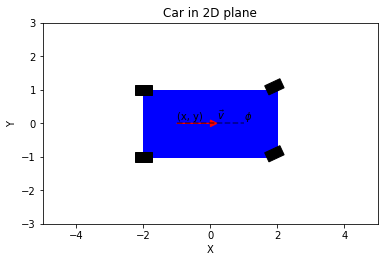

In [99]:
# Example of a car moving in a 2D plane
# Define the chassis dimensions
chassis_length = 4  # Length of the chassis
chassis_width = 2   # Width of the chassis

# Define the wheel dimensions
wheel_length = 0.5  # Length of the wheels
wheel_width = 0.3   # Width of the wheels

# Define the chassis position
chassis_x = 0       # x-coordinate of the chassis (rear center)
chassis_y = 0       # y-coordinate of the chassis (rear center)

# Define the velocity vector
velocity_x = 1      # x-component of the velocity vector
velocity_y = 0      # y-component of the velocity vector

# Create the figure and axis
fig, ax = plt.subplots()

# Plot the chassis
chassis = plt.Rectangle((chassis_x - chassis_length / 2, chassis_y - chassis_width / 2),
                        chassis_length, chassis_width, color='blue')
ax.add_patch(chassis)

# Plot the wheels
wheel_positions = [(-chassis_length / 2, -chassis_width / 2),
                   (-chassis_length / 2, chassis_width / 2),
                   (chassis_length / 2, -chassis_width / 2),
                   (chassis_length / 2, chassis_width / 2)]

wheel_rotations = [0, 0, 25, 25]  # Rotation angles for each wheel

for wheel_pos, wheel_rot in zip(wheel_positions, wheel_rotations):
    # Calculate the rotated wheel position
    x_rotated = wheel_pos[0]
    y_rotated = wheel_pos[1]
    
    # Create the rotated wheel rectangle
    wheel = plt.Rectangle((chassis_x + x_rotated - wheel_length / 2, chassis_y + y_rotated - wheel_width / 2),
                          wheel_length, wheel_width, angle=wheel_rot, color='black')
    ax.add_patch(wheel)

# add the origin x and y
plt.text(chassis_x - 1, chassis_y + 0.1, '(x, y)')
# add \phi for the rotation angle with zebra line
plt.plot([chassis_x - 1, chassis_x - 1 + velocity_x + 1], [chassis_y, chassis_y + velocity_y], 'k--', alpha=0.5)
plt.text(chassis_x - 1 + velocity_x + 1, chassis_y + velocity_y + 0.1, r'$\phi$')
# Add the velocity vector
ax.arrow(chassis_x - 1, chassis_y, velocity_x, velocity_y, head_width=0.2, head_length=0.2, fc='red', ec='red')
# add text with the velocity vector
plt.text(chassis_x - 1 + velocity_x + 0.2, chassis_y + velocity_y + 0.1, r'$\vec{v}$')
# Set plot properties
ax.set_aspect('equal')
ax.set_xlim(-5, 5)
ax.set_ylim(-3, 3)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Car in 2D plane')

# Show the plot
plt.show()


In some cases, though, a set of velocity constraints cannot be integrated to equivalent configuration constraints. Consider the chassis of a car driving on a plane. The car can move forward and backward, and it can turn left and right. The configuration of the car is defined by the position of the center of the rear axle and the orientation of the car. The velocity of the car is defined by the velocity of the center of the rear axle and the angular velocity of the car. The velocity of the car is constrained by the fact that the velocity of the center of the rear axle must be in the direction of the car's orientation. 

We can represent the configuration of the car chassis as:
$$
q = (\phi, x, y)
$$
Where $\phi$ is the orientation of the car, and x and y are the coordinates of the center of the rear axle. If the forward velocity of the car is $v$, then the velocity of the center of the rear axle is:
$$
\dot{x} = v \cos \phi \\
\dot{y} = v \sin \phi
$$
we can write $v$ as:
$$
v = \dot{y} \div \sin \phi
$$
and substitute it into the equation for $\dot{x}$:
$$
\dot{x} = (\dot{y} \div \sin \phi) \cos \phi
$$
to get the velocity constraint:
$$
\dot{x} \sin \phi - \dot{y} \cos \phi = 0
$$
we can write this as a faffian constraint:
$$
A(q) \dot{q} = A(q) \begin{bmatrix} \dot{\phi} \\ \dot{x} \\ \dot{y} \end{bmatrix} = 0
$$
where the single row of the matrix $A(q)$ is:
$$
A(q) = \begin{bmatrix}  0 & \sin \phi & -\cos \phi \end{bmatrix} \in R^{1 \times 3}
$$
Unlike a holonomic constraint, this velocity constraint cannot be integrated to give an equivalent configuration constraint. Therefor we call this a nonholonomic constraint. A nonholonomic constraint reduces the dimension of possible velocities of the car, the car cannot slide sideways, but it does not reduce the dimension of the configuration space. The configuration space of the car is still 3-dimensional, and the car can still reach any configuration in the space, as sideways motions can be achieved by a combination of forward and turning motions.


A robot can be subject to both holonomic and nonholonomic constraints. Again taking the car as an example, if we consider the chassis to be a rigid body in space, then thre holonomic constraints keep the car's chassis from deforming. The nonholonomic constraints keep the car from sliding sideways.

To summarize, a holonomic constraint is a constraint that reduces the dimension of the configuration space, while a nonholonomic constraint is a constraint that reduces the dimension of the velocity space. A holonomic constraint can be integrated to an equivalent configuration constraint, while a nonholonomic constraint cannot. A Pfaffian constraint takes the form of a matrix times the velocity vector equals zero.

## Task Space and Workspace

We already know C-space, the space of all possible configurations of a robot. Two somehow related concepts are task space and workspace.

Task space is the space in which the robot's task is naturally described, and it is independent of the robot that is performing the task. For example, if the task is to control the position of the tip of a marker on a board, then the task space is the 2-dimensional space of positions of the marker tip on the board. If the task is to control the position and orientation of a rigid body, then the task space is the 6-dimensional space of positions and orientations of the body. Only the task is needed to define the task space, not the robot. 

Workspace is a specification of the configuration that the end-effector (the tip of the robot) of a robot can reach. The workspace is dependent on the robot, and has nothing to do with the task. For example, a planar robot with 2 revolute joints limited to the range of motion of 180 and 150 degrees respectively, has a workspace that we can see in by drawing the range of motion of the end-effector.

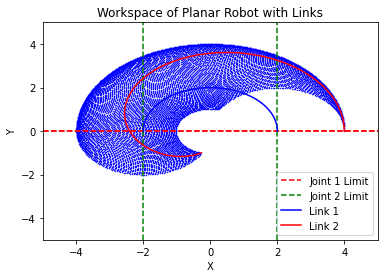

In [115]:
# The workspace of a 2-DOF planar robot arm
# Define the joint ranges in degrees
joint1_range = np.deg2rad([0, 180])   # Range of motion for joint 1 (-180 to 180 degrees)
joint2_range = np.deg2rad([0, 150])   # Range of motion for joint 2 (-150 to 150 degrees)

# Define the workspace dimensions
workspace_x = [-5, 5]   # x-axis range of the workspace
workspace_y = [-5, 5]   # y-axis range of the workspace

# Define the link lengths
link1_length = 2   # Length of link 1
link2_length = 2   # Length of link 2

# Create an array of angles for joint 1 and joint 2
theta1 = np.linspace(joint1_range[0], joint1_range[1], 100)
theta2 = np.linspace(joint2_range[0], joint2_range[1], 100)

# Create a meshgrid from theta1 and theta2
theta1_mesh, theta2_mesh = np.meshgrid(theta1, theta2)

# Calculate the x and y coordinates for each point in the workspace
x_workspace = np.cos(theta1_mesh) * link1_length + np.cos(theta1_mesh + theta2_mesh) * link2_length
y_workspace = np.sin(theta1_mesh) * link1_length + np.sin(theta1_mesh + theta2_mesh) * link2_length

# Create the figure and axis
fig, ax = plt.subplots()

# Plot the workspace
ax.plot(x_workspace, y_workspace, 'b.', markersize=1)

# Plot the joint limits as dashed lines
ax.plot([workspace_x[0], workspace_x[1]], [np.sin(joint1_range[0])*link1_length, np.sin(joint1_range[0])*link1_length], 'r--', label='Joint 1 Limit')
ax.plot([workspace_x[0], workspace_x[1]], [np.sin(joint1_range[1])*link1_length, np.sin(joint1_range[1])*link1_length], 'r--')
ax.plot([np.cos(joint1_range[0])*link1_length, np.cos(joint1_range[0])*link1_length], [workspace_y[0], workspace_y[1]], 'g--', label='Joint 2 Limit')
ax.plot([np.cos(joint1_range[1])*link1_length, np.cos(joint1_range[1])*link1_length], [workspace_y[0], workspace_y[1]], 'g--')

# Plot the robot links
x_link1 = np.cos(theta1) * link1_length
y_link1 = np.sin(theta1) * link1_length
ax.plot(x_link1, y_link1, 'b', label='Link 1')

x_link2 = x_link1 + np.cos(theta1 + theta2) * link2_length
y_link2 = y_link1 + np.sin(theta1 + theta2) * link2_length
ax.plot(x_link2, y_link2, 'r', label='Link 2')

# Set plot properties
ax.set_xlim(workspace_x)
ax.set_ylim(workspace_y)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Workspace of Planar Robot with Links')
ax.legend()

# Show the plot
plt.show()


The workspace is often defined in terms of the  Cartesian points that can be reached by the end-effector, but it is quite possible to include the orientation. The set of positions that can be reached with all possible orientations is sometimes called the dexterous workspace.

## Conclusion
In this notebook we learned about the configuration space, the space of all possible configurations of a robot. We learned that the dimension of the configuration space is the number of degrees of freedom of the robot. We learned that the configuration space can be reduced by holonomic constraints, and that the velocity space can be reduced by nonholonomic constraints. We learned that the task space is the space in which the robot's task is naturally described, and that the workspace is the set of configurations that the end-effector of a robot can reach.